# Fetal Electrocardiography

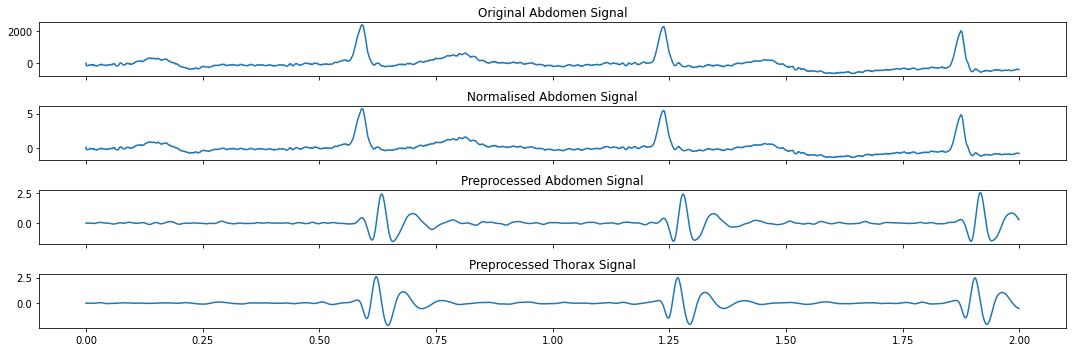

In [49]:
from scipy import signal

import numpy as np
import matplotlib.pyplot as plt
import statistics

# Retrieving the signal, consisting of 20 000 sample points measured at 1 kHz
hz = 1000
seconds = 2  # 20
samples = seconds * hz

CUTOFF_FREQ_HP = 24
CUTOFF_FREQ_LP = 80


def normalise_signal(signal):
    "Normalise signal by subtracting the mean and dividing by standard deviation"
    signal = signal - statistics.mean(signal)
    signal = signal / np.std(signal)
    return signal


def apply_smoothening_filters(input_signal, freq_cutoff_hp=CUTOFF_FREQ_HP, freq_cutoff_lp=CUTOFF_FREQ_LP):
    sos = signal.butter(6, freq_cutoff_hp, 'highpass', fs=samples, output='sos')
    highpass_filter_result = signal.sosfilt(sos, input_signal)
    sos = signal.butter(6, freq_cutoff_lp, 'lowpass', fs=samples, output='sos')

    return signal.sosfilt(sos, highpass_filter_result)


# todo: merge thorax1 and thorax2 (see third example report)
# REMEMBER TO GET RID OF THE [:samples]
t = np.linspace(0, seconds, samples, False)

signal_abdomen = (np.loadtxt('data/abdomen1.txt') + np.loadtxt('data/abdomen2.txt') +
                  np.loadtxt('data/abdomen3.txt'))[:samples] / 3
signal_thorax = (np.loadtxt('data/thorax1.txt') + np.loadtxt('data/thorax2.txt'))[:samples] / 2

# Plotting the original thorax1 signal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(15, 5))

# Plot the original signal
ax1.plot(t, signal_abdomen)
ax1.set_title('Original Abdomen Signal')

# Normalise and plot signal
signal_abdomen = normalise_signal(signal_abdomen)
signal_thorax = normalise_signal(signal_thorax)

ax2.plot(t, signal_abdomen)
ax2.set_title('Normalised Abdomen Signal')

# Apply the highpass filter
h_abdomen = apply_smoothening_filters(signal_abdomen)
h_thorax = apply_smoothening_filters(signal_thorax)

ax3.plot(t, h_abdomen)
ax3.set_title('Preprocessed Abdomen Signal')

ax4.plot(t, h_thorax)
ax4.set_title('Preprocessed Thorax Signal')

plt.tight_layout()
plt.show()
